In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = pd.read_pickle("data/full_data.csv")
df

/usr/local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
df['local_agreement'] = df['local_agreement'] - 0.5

In [ ]:
granularity = 100
patch_chaos = []
for x in tqdm(np.arange(0,1000,granularity), desc="x loop", leave=True):
    acc = []
    for y in tqdm(np.arange(0,1000,granularity), desc="y loop", leave=True):
        temp = df[(df.x_coordinate>=x) & (df.x_coordinate<x+granularity) & (df.y_coordinate>=y) & (df.y_coordinate<y+granularity)]
        acc.append((temp.local_agreement-0.5).mean())
    patch_chaos.append(acc)

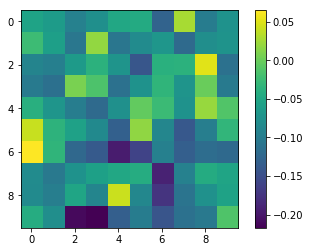

In [9]:
plt.imshow(patch_chaos)
plt.colorbar()
plt.show()

In [7]:
granularity = 100
df["x_category"] = pd.cut(df.x_coordinate, bins=np.arange(-1,1001,granularity), labels=False)
df["y_category"] = pd.cut(df.y_coordinate, bins=np.arange(-1,1001,granularity), labels=False)

In [8]:
nb_time_bins = (3*24+16)*6       # 10 min slices over 3 day and 16 hours
df["time_category"] = pd.cut(df.ts, bins=nb_time_bins, labels=False)

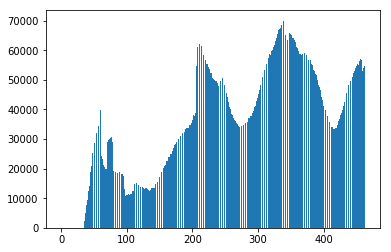

In [9]:
plt.bar(np.arange(df.time_category.nunique()),df.groupby('time_category').size())
plt.show()

In [10]:
set(range(nb_time_bins))-set(df.time_category)

{2,
 7,
 10,
 12,
 18,
 19,
 24,
 27,
 30,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 48,
 49,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 91,
 97,
 98,
 99}

In [11]:
active_df = df[df['time_category']>=100]

In [12]:
local_agreement_by_zone = active_df.groupby(['x_category','y_category','time_category'])['local_agreement'].sum()

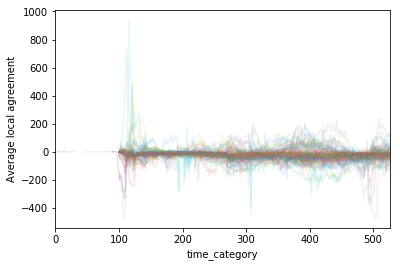

In [13]:
local_agreement_by_zone.unstack(level=[0,1]).plot(alpha=0.1, legend=None)
plt.ylabel('Average local agreement')
plt.savefig('figures/avg_local_agreement_on_patches_over_time.png')
plt.show()

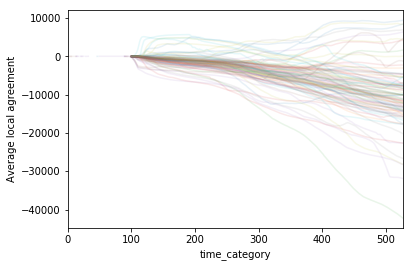

In [14]:
local_agreement_by_zone.unstack(level=[0,1]).cumsum().plot(alpha=0.1, legend=None)
plt.ylabel('Average local agreement')
plt.savefig('figures/avg_local_agreement_on_patches_cumsum.png')
plt.show()